# Natural Disasters Data Analysis
## Dataset 1 - Geocoded Disasters (GDIS) Dataset, v1 (1960 – 2018)
This dataset contains 39,953 locations for 9,924 global disasters from 1960 to 2018, including floods, storms, earthquakes, landslides, droughts, volcanic activity, and extreme temperatures.


In [1]:
# Dependencies and Setup
import pandas as pd
import hvplot.pandas
import holoviews as hv
import matplotlib.pyplot as plt
import scipy.stats as st
from citipy import citipy
from bokeh.plotting import figure

csv_file = 'Resources/pend-gdis-1960-2018-disasterlocations.csv'

### Function Creation

In [2]:
# Defining function for geoplotting locations affected by natural disasters

def geo_plot_by_decade(df, decade, title):
    points_to_chart = df.loc[df['decade'] == decade]
    p = figure(width=700, height=500, sizing_mode='fixed')
    
    # Create the map plot
    map_plot = points_to_chart.hvplot.points(
        "longitude",
        "latitude",
        # Configure the map plot
        geo="True", # show geo data
        tiles="OSM",  # OpenStreetMap tiles
        # sizing_mode='fixed',
        frame_width=700,
        frame_height=500,
        size='level',  # Size of the points determined by level
        color="decade",  # Color by city
        scale=1,
        title=title)

    # Save output
    hv.save(map_plot, f'output/hvplot_{title}.png', fmt='png')
    
    # Display the map
    return map_plot

In [3]:
# Defining function for geoplotting regions (magnitude defined by number of instances) affected by natural disasters

def geo_plot_by_decade_volume(df):
    # Create the map plot
    p = figure(width=700, height=500, sizing_mode='fixed')
    map_plot = df.hvplot.points(
        "longitude",
        "latitude",
        
        # Configure the map plot
        geo="True", # show geo data
        tiles="OSM",  # OpenStreetMap tiles
        # sizing_mode='fixed',
        frame_width=700,
        frame_height=500,
        size='Scaled Size',  # Size of the points determined by Freq
        color='count',  # Color by city
        scale=1,
        cmap='Rainbow',
        xlim=(-180, 180),  
        ylim=(-75, 75),
        groupby=['decade', 'disastertype'],
        hover_cols=['approximate_location','country','count'])
    
    # Save output
    hv.save(map_plot, f'output/storm_count_by_decade.png', fmt='png')
    
    # Display the map
    return map_plot

In [4]:
# Defining function to create Linear Regression plots

def plot_linear_regression(x, y, xlabel, ylabel, title): #, hemisphere):
    # Set data ranges for formatting plots 
    x_min = min(x)
    x_max = max(x)
    x_range = x_max - x_min
    y_min = min(y)
    y_max = max(y)
    y_range = y_max - y_min
    
    # Calc regression
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
    # Calc regress values for y values on line 
    regress_values = x * slope + intercept
    # Format regression equation for display
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    r2 = round(rvalue**2, 3)
    # Print the r^2 value
    print(f'The r^2-value is: {r2}')
    
    # plot the regression
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,
                 (x_min+x_range*0.05,y_max+y_range*0.1),
                 fontsize=15,
                 color="red")
    plt.annotate(f'r^2={r2}',
                 (x_min+x_range*0.65,y_max+y_range*0.1),
                 fontsize=15,
                 color="red")
    # plot the data
    plt.scatter(x, y)
    
    # Format plt
    plt.axis([x_min-x_range*0.05, 
              x_max+x_range*0.05, 
              y_min-y_range*0.05, 
              y_max+y_range*0.2])
    plt.title(f'{title}')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)

    # Save output
    plt.savefig(f'output/linear_regression_{title}.png')
    
    # Show plot
    plt.show()

In [5]:
# Defining function to cross check latitude and longitude

def get_nearest_city(row):
    try:
        return citipy.nearest_city(row["latitude"], row["longitude"]).city_name
    except:
        return "N/A"

### Import Dataset 1

In [6]:
# Read in csv file
import_df = pd.read_csv(csv_file)

# Clean up DF
df = import_df[['id','country','year','level','location','disastertype','disasterno','latitude','longitude']]
df.head()

,id,country,year,level,location,disastertype,disasterno,latitude,longitude
0,109,Albania,2009,3,Ana E Malit,flood,2009-0631,42.020948,19.418317
1,109,Albania,2009,3,Bushat,flood,2009-0631,41.959294,19.514309
2,175,Angola,2001,3,Onjiva,flood,2001-0146,-17.093484,15.665758
3,187,Angola,2009,3,Evale,flood,2009-0092,-16.531533,15.773987
4,187,Angola,2009,3,Mupa,flood,2009-0092,-16.200065,15.844189


### Regression Analysis on Disaster Types

The r^2-value is: 0.799


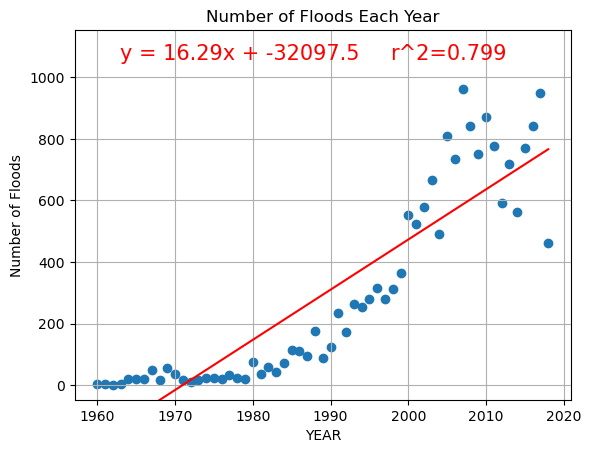

In [7]:
# Creation of dataframe containing all locations impacted by floods
floods_df = pd.DataFrame(df.loc[df['disastertype'] == 'flood', 'year'])
floods_by_year = floods_df.groupby('year').value_counts()
fby_df = pd.DataFrame(floods_by_year).reset_index()

# Defining x and y variables for linear regression
x = fby_df['year']
y = fby_df['count']

# Execute plot_linear_regression function to generate correlation and plot
plot_linear_regression(x, y, 'YEAR', 'Number of Floods', 'Number of Floods Each Year')

The r^2-value is: 0.806


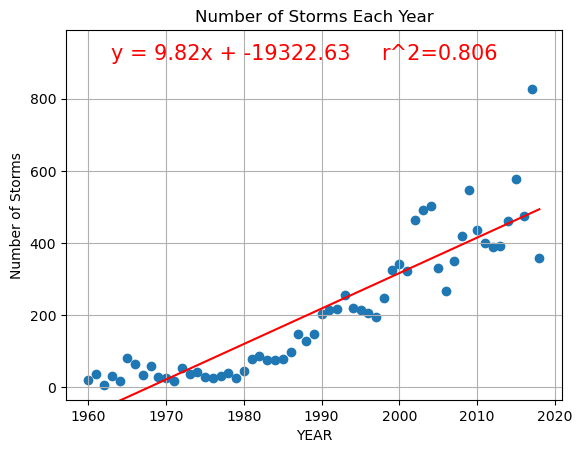

In [8]:
# Creation of dataframe containing all locations impacted by storms
s_df = pd.DataFrame(df.loc[df['disastertype'] == 'storm', 'year'])
s_by_year = s_df.groupby('year').value_counts()
sby_df = pd.DataFrame(s_by_year).reset_index()

# Defining x and y variables for linear regression
x = sby_df['year']
y = sby_df['count']

# Execute plot_linear_regression function to generate correlation and plot
plot_linear_regression(x, y, 'YEAR', 'Number of Storms', 'Number of Storms Each Year')

#### Earthquakes and Volcanic Activity
- While it is easier to understand the relationship between floods and storms with climate change over time, earthquakes and volcanic activity have a less intuitive relationship.
- Earthquakes seem to have a higher correlation than volcanic activity
- The relationship (or slope in the regression analysis) in volcanic activity shows a baseline of 0.34 that can also be used to look at the increase in disaster reporting over time. This can b e attributed to more sensors, better communication and increased scientific study over time.
- The low r^2 value with volcanic activity also demonstrates a low probability of correlation. 

The r^2-value is: 0.612


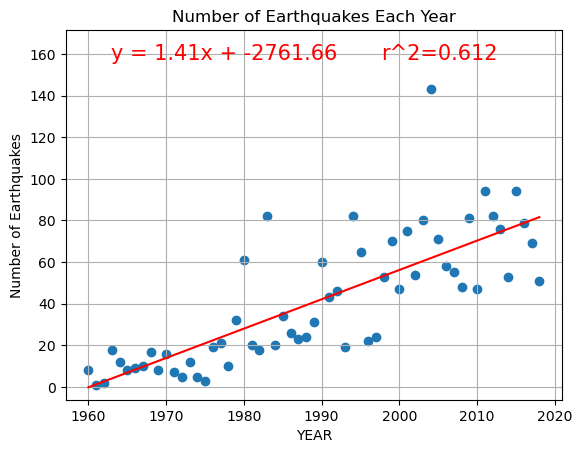

In [9]:
# Creation of dataframe containing all locations impacted by earthquakes
eq_df = pd.DataFrame(df.loc[df['disastertype'] == 'earthquake', 'year'])
eq_by_year = eq_df.groupby('year').value_counts()
eqby_df = pd.DataFrame(eq_by_year).reset_index()

# Defining x and y variables for linear regression
x = eqby_df['year']
y = eqby_df['count']

# Execute plot_linear_regression function to generate correlation and plot
plot_linear_regression(x, y, 'YEAR', 'Number of Earthquakes', 'Number of Earthquakes Each Year')

The r^2-value is: 0.322


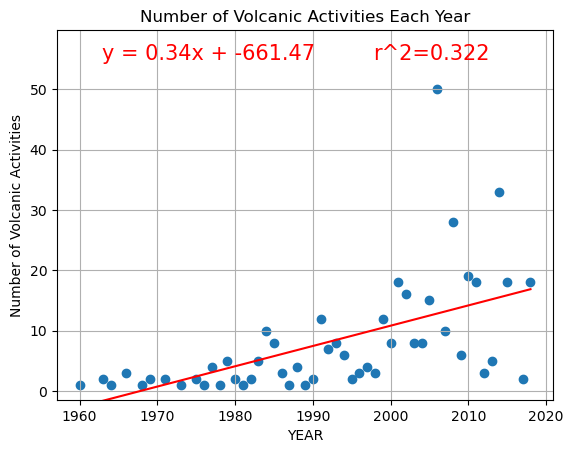

In [10]:
# Creation of dataframe containing all locations impacted by volcanic activity
v_df = pd.DataFrame(df.loc[df['disastertype'] == 'volcanic activity', 'year'])
v_by_year = v_df.groupby('year').value_counts()
vby_df = pd.DataFrame(v_by_year).reset_index()

# Defining x and y variables for linear regression
x = vby_df['year']
y = vby_df['count']

# Execute plot_linear_regression function to generate correlation and plot
plot_linear_regression(x, y, 'YEAR', 'Number of Volcanic Activities', 'Number of Volcanic Activities Each Year')

### Exploration of Trends

In [11]:
# Identifying level vs. total number of storms
disaster_count_df = df.drop_duplicates(subset = ['id']).groupby(['level'])['disastertype'].count()
disaster_count_df.head()

level
1    5965
2    3237
3     722
Name: disastertype, dtype: int64

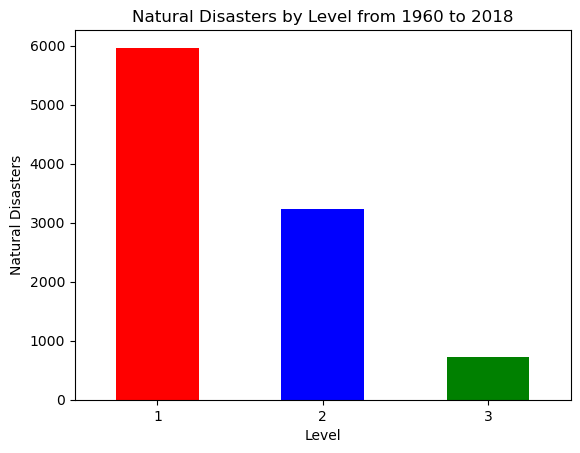

In [12]:
# Creation of bar graph showcasing different levels
disaster_count_df.plot(kind = 'bar', title = 'Natural Disasters by Level from 1960 to 2018', xlabel = 'Level', ylabel = 'Natural Disasters',color = ['red','blue','green'])
plt.xticks(rotation='horizontal')
plt.savefig(f'output/Disaster_bar_graph.png')
plt.show()

In [13]:
# Creation of approximate_location_df to consolidate locations affected by natural disasters
approximate_location_df = df.copy()

# Creation of approximate_location column with usage of get_nearest_city function
approximate_location_df['approximate_location'] = approximate_location_df.apply(get_nearest_city, axis=1)
approximate_location_df['approximate_location'] = approximate_location_df['approximate_location'].str.capitalize()

# Outputting dataframe for reference
approximate_location_df.to_csv('output/approximate_location_df.csv', index = False)

# Display the dataframe
approximate_location_df.head()

,id,country,year,level,location,disastertype,disasterno,latitude,longitude,approximate_location
0,109,Albania,2009,3,Ana E Malit,flood,2009-0631,42.020948,19.418317,Shkoder
1,109,Albania,2009,3,Bushat,flood,2009-0631,41.959294,19.514309,Shkoder
2,175,Angola,2001,3,Onjiva,flood,2001-0146,-17.093484,15.665758,Ondjiva
3,187,Angola,2009,3,Evale,flood,2009-0092,-16.531533,15.773987,Ondjiva
4,187,Angola,2009,3,Mupa,flood,2009-0092,-16.200065,15.844189,Ondjiva


In [14]:
# Creation of decades df
decades = approximate_location_df.copy()

# Binning years
bins = [1960,1970,1980,1990,2000,2010,2020]
group_names = ['1960s','1970s','1980s','1990s','2000s','2010s']

# Adding decade column into dataframe
decades['decade'] = pd.cut(df['year'],
                           bins, labels=group_names, 
                           include_lowest=True)
# Display the dataframe
decades.head()

,id,country,year,level,location,disastertype,disasterno,latitude,longitude,approximate_location,decade
0,109,Albania,2009,3,Ana E Malit,flood,2009-0631,42.020948,19.418317,Shkoder,2000s
1,109,Albania,2009,3,Bushat,flood,2009-0631,41.959294,19.514309,Shkoder,2000s
2,175,Angola,2001,3,Onjiva,flood,2001-0146,-17.093484,15.665758,Ondjiva,2000s
3,187,Angola,2009,3,Evale,flood,2009-0092,-16.531533,15.773987,Ondjiva,2000s
4,187,Angola,2009,3,Mupa,flood,2009-0092,-16.200065,15.844189,Ondjiva,2000s


In [15]:
# Identifying approximate locations affected by disaster type and decade
approximate_location_count = decades.groupby(['disastertype','approximate_location', 'decade'], observed=True)['id'].nunique().reset_index(name='count')

# Taking latitude and longitude data from decades df
locations_df = decades.drop_duplicates(subset = 'approximate_location')[['approximate_location','latitude','longitude','country']]

# Merging approximate_location_count and locations_df for geoplotting purposes
storm_count_by_decade = pd.merge(approximate_location_count,locations_df, how='left',on='approximate_location')

# Df cleanup
storm_count_by_decade = storm_count_by_decade[(storm_count_by_decade['count'] != 0)].reset_index()

# Creating mark size for geoplot
storm_count_by_decade['Scaled Size'] = storm_count_by_decade.apply(lambda x: x['count'] * 25, axis = 1)

# Display the dataframe
storm_count_by_decade.head()

,index,disastertype,approximate_location,decade,count,latitude,longitude,country,Scaled Size
0,0,drought,'ali sabieh,1990s,1,11.243546,42.905201,Djibouti,25
1,1,drought,'ali sabieh,2000s,4,11.243546,42.905201,Djibouti,100
2,2,drought,Abancay,1980s,1,-13.732697,-72.834497,Peru,25
3,3,drought,Abancay,2000s,1,-13.732697,-72.834497,Peru,25
4,4,drought,Abeche,2000s,2,13.540096,21.156536,Chad,50


In [16]:
# Count unique storm ids (unique natural disaster events) per approximate location
storm_counts_by_location = decades.groupby(['approximate_location', 'country','latitude','longitude'])['id'].nunique().reset_index(name='unique_storm_count')

# Find the city with the maximum number of storms
most_impacted_city = storm_counts_by_location.loc[storm_counts_by_location['unique_storm_count'].idxmax()]

# Creation of city, country, and count variables for print output
city = most_impacted_city['approximate_location']
country = most_impacted_city['country']
count = most_impacted_city['unique_storm_count']
latitude = most_impacted_city['latitude']
longitude = most_impacted_city['longitude']

# Print the result
print(f'{city}, {country} has had the most natural disasters from 1960 to 2018 with {count} disasters')
print(f'{latitude}   {longitude}')

Brady, United States has had the most natural disasters from 1960 to 2018 with 161 disasters
31.49105418   -99.35798439


In [17]:
# Creation of df to identify cities with most events based on decade and disaster type
max_storm_count_by_decade = storm_count_by_decade.loc[storm_count_by_decade.groupby(['decade', 'disastertype'], observed=True)['count'].idxmax()].reset_index(drop=True)

# Display the dataframe
max_storm_count_by_decade.head()

,index,disastertype,approximate_location,decade,count,latitude,longitude,country,Scaled Size
0,627,drought,Gaalkacyo,1960s,2,6.377660,48.151127,Somalia,50
1,2562,earthquake,Chelghoum el aid,1960s,2,36.292446,6.145987,Algeria,50
2,4443,extreme temperature,Clinton,1960s,1,35.987992,-99.005353,United States,25
3,12089,flood,Pandaan,1960s,4,-7.720070,112.733445,Indonesia,100
4,15186,landslide,Bonneville,1960s,3,46.053031,6.436520,France,75


In [18]:
# Interactive geoplot 
geo_plot_by_decade_volume(storm_count_by_decade)

:DynamicMap   [decade,disastertype]
   :Overlay
      .WMTS.I   :WMTS   [Longitude,Latitude]
      .Points.I :Points   [longitude,latitude]   (count,Scaled Size,approximate_location,country)

### Geospacial Plots of Flooding by Decades

In [19]:
geo_plot_by_decade(decades, '1960s', 'Location of Floods in 1960s')

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [longitude,latitude]   (decade,level)

In [20]:
floods_w_decades = decades.loc[decades['disastertype'] == 'flood']
geo_plot_by_decade(floods_w_decades, '1970s', 'Location of Floods in 1970s')

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [longitude,latitude]   (decade,level)

In [21]:
geo_plot_by_decade(floods_w_decades, '1980s', 'Location of Floods in 1980s')

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [longitude,latitude]   (decade,level)

In [22]:
geo_plot_by_decade(floods_w_decades, '1990s', 'Location of Floods in 1990s')

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [longitude,latitude]   (decade,level)

In [23]:
geo_plot_by_decade(floods_w_decades, '2000s', 'Location of Floods in 2000s')

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [longitude,latitude]   (decade,level)

In [24]:
geo_plot_by_decade(floods_w_decades, '2010s', 'Location of Floods in 2010s')

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [longitude,latitude]   (decade,level)

In [25]:
# Geoplot of all floods from 1960 to 2018

points_to_chart = floods_w_decades
# Create the map plot
map_plot_floods = points_to_chart.hvplot.points(
    "longitude",
    "latitude",
    # Configure the map plot
    geo="True", # show geo data
    tiles="OSM",  # OpenStreetMap tiles
    frame_width=700,
    frame_height=500,
    size='level',  # Size of the points determined by Humidity
    color="year",  # Color by city
    scale=1,
    title="Locations of Floods 1960-2018"
)

# Display the map
map_plot_floods

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [longitude,latitude]   (year,level)

The r^2-value is: 0.001


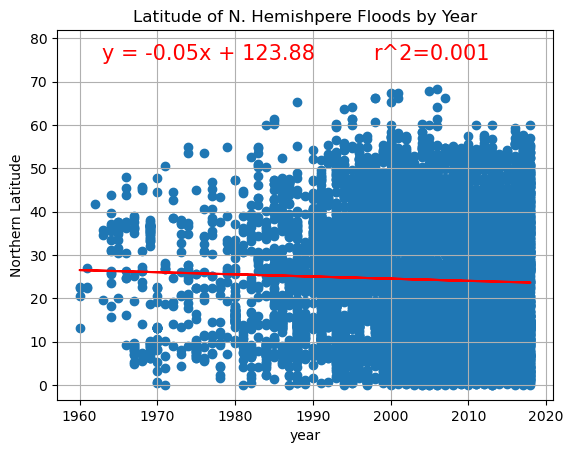

In [26]:
# Creation of dataframe containing all locations with latitudes in Northern Hemisphere and flood disaster type
floods_w_decades_n_hemishere = floods_w_decades.loc[floods_w_decades['latitude'] >= 0]

# Defining x and y variables for linear regression
x = floods_w_decades_n_hemishere['year']
y = floods_w_decades_n_hemishere['latitude']

# Execute plot_linear_regression function to generate correlation and plot
plot_linear_regression(x, y, 'year', 'Northern Latitude', 'Latitude of N. Hemishpere Floods by Year')

The r^2-value is: 0.001


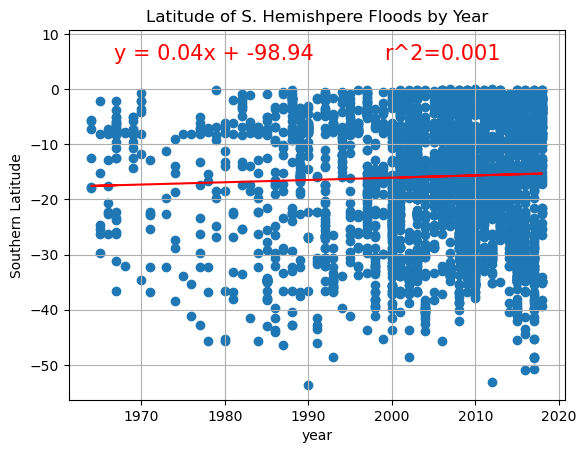

In [27]:
# Creation of dataframe containing all locations with latitudes in Southern Hemisphere and flood disaster type
floods_w_decades_s_hemishere = floods_w_decades.loc[floods_w_decades['latitude'] < 0]

# Defining x and y variables for linear regression
x = floods_w_decades_s_hemishere['year']
y = floods_w_decades_s_hemishere['latitude']

# Execute plot_linear_regression function to generate correlation and plot
plot_linear_regression(x, y, 'year', 'Southern Latitude', 'Latitude of S. Hemishpere Floods by Year')

The r^2-value is: 0.0


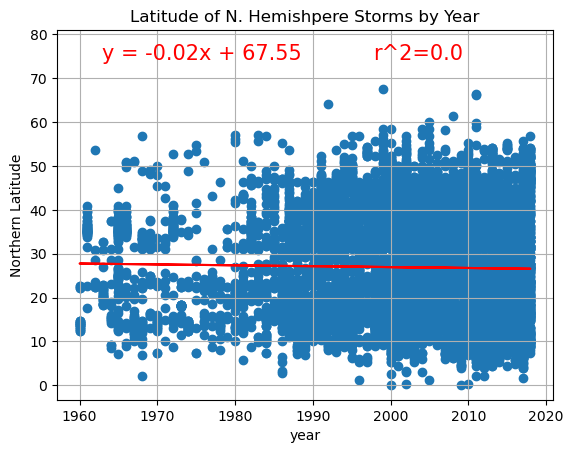

In [28]:
# Creation of dataframe containing all locations with latitudes in Northern Hemisphere and storms disaster type
n_hemisphere = df.loc[df['latitude'] >= 0]
storms_nh = n_hemisphere.loc[n_hemisphere['disastertype'] == 'storm']

# Defining x and y variables for linear regression
x = storms_nh['year']
y = storms_nh['latitude']

# Execute plot_linear_regression function to generate correlation and plot
plot_linear_regression(x, y, 'year', 'Northern Latitude', 'Latitude of N. Hemishpere Storms by Year')

The r^2-value is: 0.0


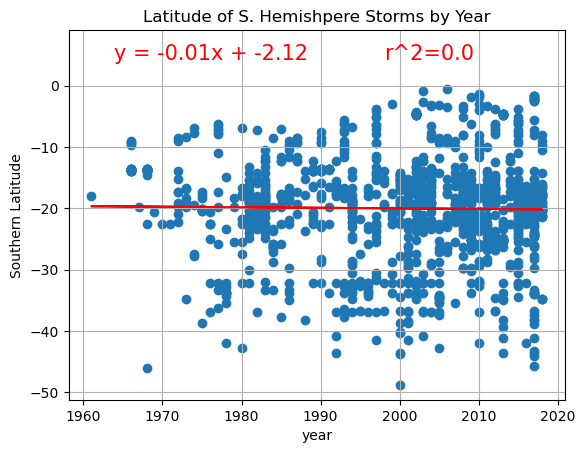

In [29]:
# Creation of dataframe containing all locations with latitudes in Southern Hemisphere and storms disaster type
s_hemisphere = df.loc[df['latitude'] < 0]
storms_sh = s_hemisphere.loc[s_hemisphere['disastertype'] == 'storm']

# Defining x and y variables for linear regression
x = storms_sh['year']
y = storms_sh['latitude']

# Execute plot_linear_regression function to generate correlation and plot
plot_linear_regression(x, y, 'year', 'Southern Latitude', 'Latitude of S. Hemishpere Storms by Year')

## Dataset 2 - U.S. Billion-dollar Weather and Climate Disasters, 1980 - present 
This dataset contains U.S. disaster cost assessments of the total, direct losses ($) inflicted by: tropical cyclones, inland floods, drought & heat waves, severe local storms (i.e., tornado, hail, straight-line wind damage), wildfires, crop freeze events and winter storms.

### Import Dataset 2

In [42]:
# Read in csv file
csv_file = 'Resources/events-US-1980-2024-Q3.csv'
df = pd.read_csv(csv_file)

#Cleaning up data frame
df.columns = df.iloc[1]
df = df.drop(df.index[0:2]).reset_index(drop=True)
df = df[pd.to_numeric(df['CPI-Adjusted Cost'], errors='coerce').notna()]
df[['CPI-Adjusted Cost','Unadjusted Cost', 'Deaths']]= df[['CPI-Adjusted Cost','Unadjusted Cost', 'Deaths']].astype(float)

#Display the dataframe
df.head()

1,Name,Disaster,Begin Date,End Date,CPI-Adjusted Cost,Unadjusted Cost,Deaths
0,Southern Severe Storms and Flooding (April 1980),Flooding,19800410,19800417,2742.3,706.8,7.0
1,Hurricane Allen (August 1980),Tropical Cyclone,19800807,19800811,2230.2,590.0,13.0
2,Central/Eastern Drought/Heat Wave (Summer-Fall...,Drought,19800601,19801130,40480.8,10020.0,1260.0
3,Florida Freeze (January 1981),Freeze,19810112,19810114,2070.6,572.0,0.0
4,"Severe Storms, Flash Floods, Hail, Tornadoes (...",Severe Storm,19810505,19810510,1405.2,401.4,20.0


In [44]:
df['YEAR'] = df['Begin Date'].str[:4]
df['YEAR'] = df['YEAR'].astype(int)
df.head()

1,Name,Disaster,Begin Date,End Date,CPI-Adjusted Cost,Unadjusted Cost,Deaths,YEAR
0,Southern Severe Storms and Flooding (April 1980),Flooding,19800410,19800417,2742.3,706.8,7.0,1980
1,Hurricane Allen (August 1980),Tropical Cyclone,19800807,19800811,2230.2,590.0,13.0,1980
2,Central/Eastern Drought/Heat Wave (Summer-Fall...,Drought,19800601,19801130,40480.8,10020.0,1260.0,1980
3,Florida Freeze (January 1981),Freeze,19810112,19810114,2070.6,572.0,0.0,1981
4,"Severe Storms, Flash Floods, Hail, Tornadoes (...",Severe Storm,19810505,19810510,1405.2,401.4,20.0,1981


The r^2-value is: 0.008


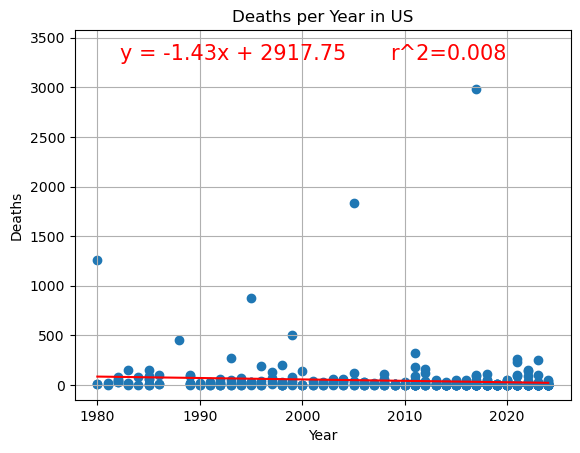

In [45]:
# Plotting Deaths vs. Year
plot_linear_regression(df['YEAR'], df['Deaths'], 'Year','Deaths', 'Deaths per Year in US')

The r^2-value is: 0.0


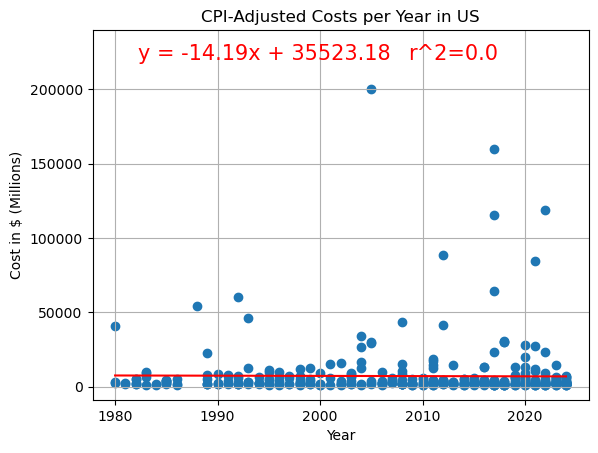

In [47]:
# Plotting Cost vs. Year
plot_linear_regression(df['YEAR'], df['CPI-Adjusted Cost'], 'Year', 'Cost in $ (Millions)', 'CPI-Adjusted Costs per Year in US')

The r^2-value is: 0.356


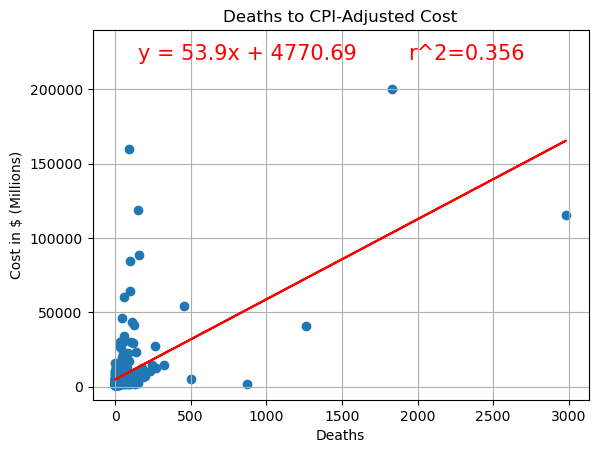

In [48]:
# Plotting Deaths vs. CPI-Adjusted Cost
plot_linear_regression(df['Deaths'], df['CPI-Adjusted Cost'], 'Deaths', 'Cost in $ (Millions)', 'Deaths to CPI-Adjusted Cost')

The r^2-value is: 0.956


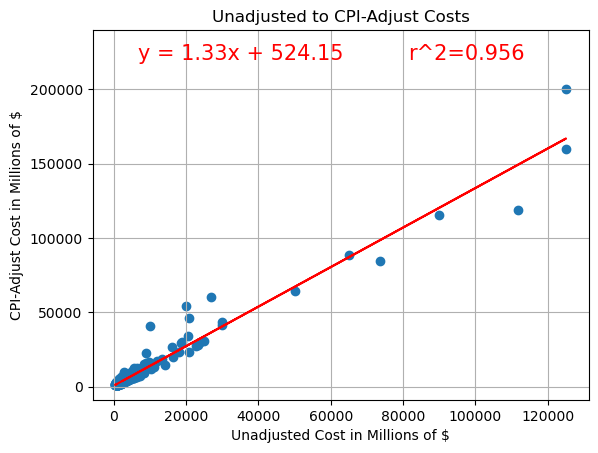

In [49]:
# Plotting Unadjusted Cost vs. CPI-Adjusted Cost
plot_linear_regression(df['Unadjusted Cost'], df['CPI-Adjusted Cost'], 'Unadjusted Cost in Millions of $', 'CPI-Adjust Cost in Millions of $', 'Unadjusted to CPI-Adjust Costs')

In [50]:
# Configuring Begin and End Data columns
df['Begin Date'] = pd.to_datetime(df['Begin Date'], format='%Y%m%d')
df['End Date'] = pd.to_datetime(df['End Date'], format='%Y%m%d')

# Calculate the duration in days
df['Duration'] = (df['End Date'] - df['Begin Date']).dt.days
df.sort_values(['Deaths'],ascending=False).head()

1,Name,Disaster,Begin Date,End Date,CPI-Adjusted Cost,Unadjusted Cost,Deaths,YEAR,Duration
255,Hurricane Maria (September 2017),Tropical Cyclone,2017-09-19,2017-09-21,115200.0,90000.0,2981.0,2017,2
119,Hurricane Katrina (August 2005),Tropical Cyclone,2005-08-25,2005-08-30,200047.3,125029.5,1833.0,2005,5
2,Central/Eastern Drought/Heat Wave (Summer-Fall...,Drought,1980-06-01,1980-11-30,40480.8,10020.0,1260.0,1980,182
64,"Central, Southern and Northeast Drought/Heat W...",Drought,1995-07-01,1995-09-30,2017.6,984.0,872.0,1995,91
88,Eastern Drought/Heat Wave (Summer 1999),Drought,1999-06-01,1999-08-31,4772.8,2498.9,502.0,1999,91


The r^2-value is: 0.005


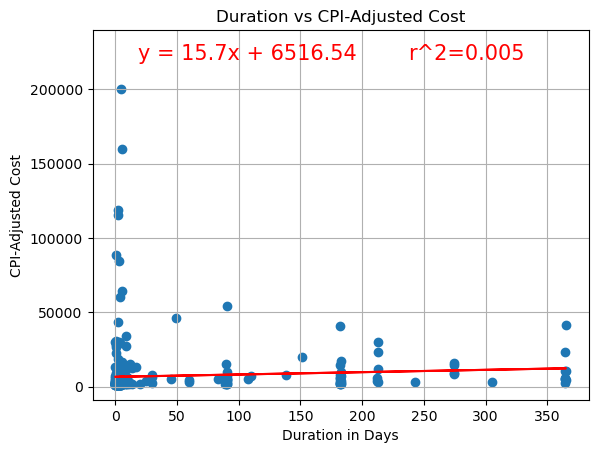

In [51]:
# Plotting Duration vs. CPI-Adjusted Cost
plot_linear_regression(df['Duration'], df['CPI-Adjusted Cost'], 'Duration in Days', 'CPI-Adjusted Cost', 'Duration vs CPI-Adjusted Cost')

In [52]:
# Put types into a list for for loop (and later for plot labels)
types = ['Flooding', 'Tropical Cyclone', 'Drought', 'Freeze', 'Severe Storm', 'Winter Storm', 'Wildfire']

# Create empty list to fill with costs data (for plotting)
costs = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for disaster in types:
    # create empty list for outliers
    outliers = []

    # Locate the rows which contain each disaster
    cost_data = df.loc[df['Disaster'] == disaster, 'CPI-Adjusted Cost'].astype(float).tolist()

    # add subset
    costs.append(cost_data)

    # Convert to a Pandas Series
    cost_series = pd.Series(cost_data)
    
    # Determine quartiles
    quartiles = cost_series.quantile([0.25, 0.5, 0.75])
    
    # Determine outliers using upper and lower bounds
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    for volume in cost_data:
        if volume < lower_bound or volume > upper_bound:
            outliers.append(volume)
   

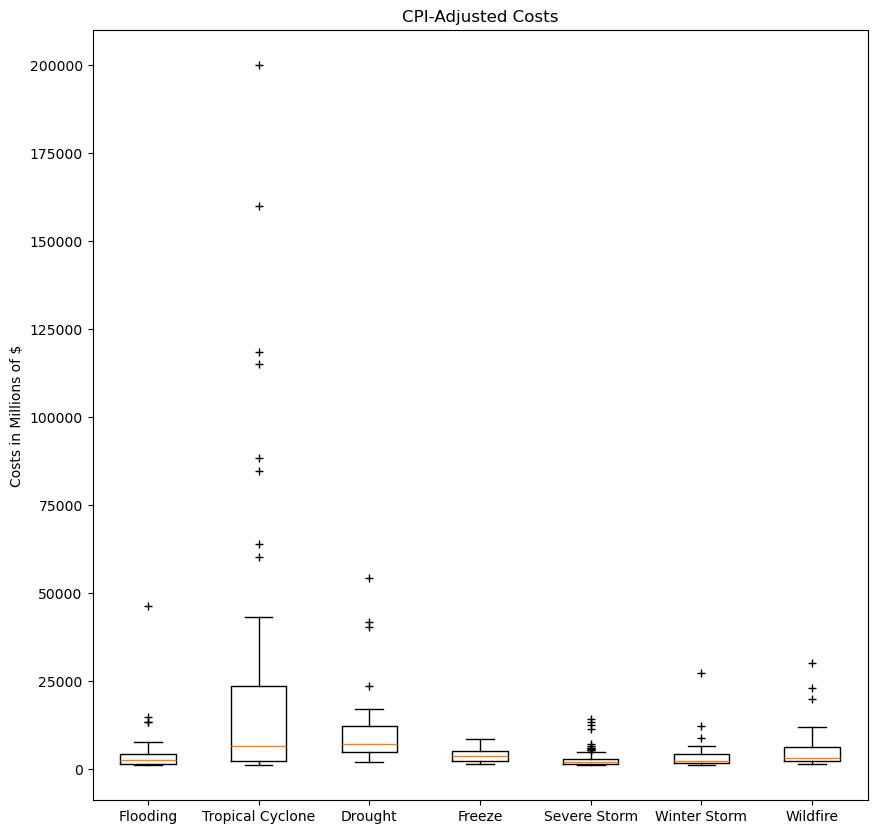

In [53]:
# Generate a box plot that shows the distribution of the CPI-Adjusted costs for each disaster type.
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.set_title('CPI-Adjusted Costs')
ax1.set_ylabel('Costs in Millions of $')
flierprops = dict(marker='+', 
                  color='red')
ax1.boxplot(costs,          # values of costs broken out by disaster type
            tick_labels=types, 
            flierprops=flierprops)
plt.savefig(f'output/box_costs.png')
plt.show()

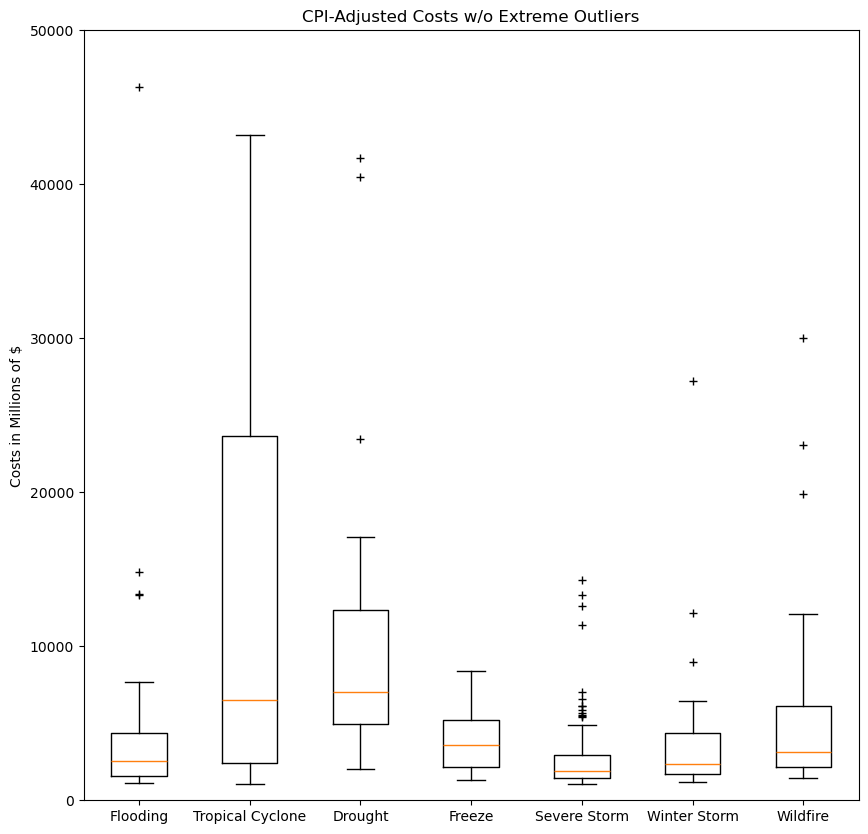

In [54]:
# Generate a box plot that shows the distribution of the CPI-Adjusted costs for each disaster type (removing extreme outliers)
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.set_title('CPI-Adjusted Costs w/o Extreme Outliers')
ax1.set_ylabel('Costs in Millions of $')
ax1.set_ylim(0, 50000)      # limit upper range to ommit outliers and give more definition to the box plots
flierprops = dict(marker='+', 
                  color='red')
ax1.boxplot(costs,          # values of costs broken out by disaster type
            tick_labels=types, 
            flierprops=flierprops)
plt.savefig(f'output/box_costs_no_outliers.png')
plt.show()

In [55]:

# Re-use types from the previous box plots
# Create empty list to fill with costs data (for plotting)
deaths = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for disaster in types:
    outliers = []

    # Locate the rows which contain each disaster
    death_data = df.loc[df['Disaster'] == disaster, 'Deaths'].astype(float).tolist()

    # add subset
    deaths.append(death_data)

    # Convert to a Pandas Series
    death_series = pd.Series(death_data)
    
    # Determine quartiles
    quartiles = death_series.quantile([0.25, 0.5, 0.75])
    
    # Determine outliers using upper and lower bounds
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    for volume in death_data:
        if volume < lower_bound or volume > upper_bound:
            outliers.append(volume)
   

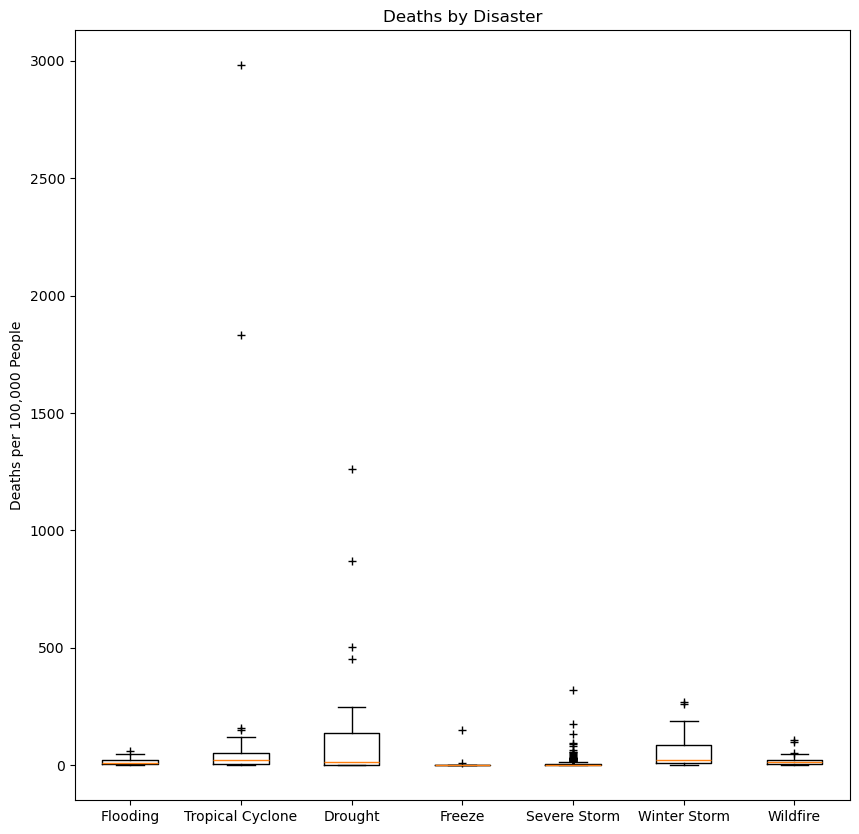

In [56]:
# Generate a box plot that shows the distribution of deaths for each disaster type
fig2, ax2 = plt.subplots(figsize=(10,10))
ax2.set_title('Deaths by Disaster')
ax2.set_ylabel('Deaths per 100,000 People')
flierprops = dict(marker='+', 
                  color='red')
ax2.boxplot(deaths,         # number of deaths broken out by disaster type
            tick_labels=types, 
            flierprops=flierprops)
plt.savefig(f'output/box_deaths.png')
plt.show()

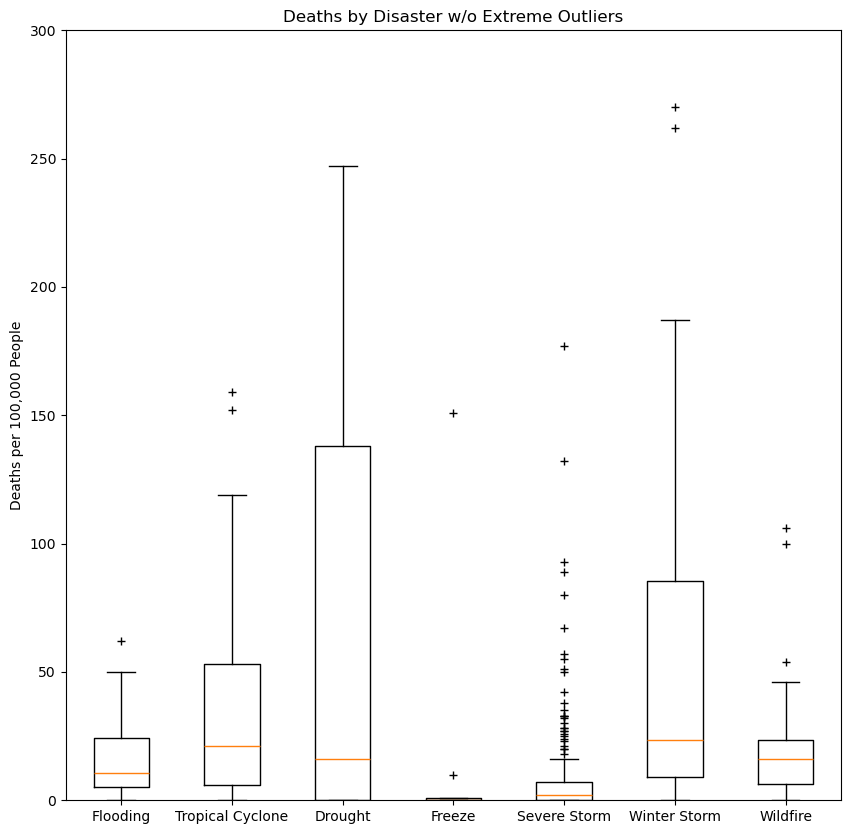

In [57]:
# Generate a box plot that shows the distribution of the deaths for each disaster type (removing extreme outliers)
fig2, ax2 = plt.subplots(figsize=(10,10))
ax2.set_title('Deaths by Disaster w/o Extreme Outliers')
ax2.set_ylabel('Deaths per 100,000 People')
ax2.set_ylim(0, 300)        # limit range to show more detail and ommit outliers
flierprops = dict(marker='+', 
                  color='red')
ax2.boxplot(deaths,         # number of deaths broken out by disaster type
            tick_labels=types, 
            flierprops=flierprops)
plt.savefig(f'output/box_deaths_no_outliers.png')
plt.show()